# Project 1A: House Prices in Greece

by Charalampos Spanias, 26 October 2021.

This is the project notebook for investigating Houses Prices in Greece via an Exploratory Data Analysis (EDA). 

House prices in Greece are considered to be "low" in comparison to other European countries or the UK.

The following analysis checks what is the average price of a house in Greece and on which factors his price depends.

## Getting the data

The following dataset of the Economic Data website is used: <https://www.econdb.com/series/HOUGR/> , lists the House Prices from 2006 up to 2020. The use of a common currency allows us to compare GDP values across countries. The dataset was imported via the pandas_datareader module, as they ECONDB is part of it, the 26th of October 2021.

In [1]:
import pandas as pd
import os
import pandas_datareader.data as web

df = web.DataReader('ticker=HOUGR', 'econdb')
df

Frequency,Quarterly
Reference area,Greece
Value,Real
Unit of measure,"Index, 2010 = 100"
TIME_PERIOD,
2017-01-01,62.94
2017-04-01,62.13
2017-07-01,62.73
2017-10-01,62.39
2018-01-01,63.32
2018-04-01,62.58


At the top of the dataframe some information about the dataset itself (also known as *metadata*) is contained. The frequency of the reported prices is quarterly and the units of measure have as index the year 2010 (= 100). The latter is the known as the *base year*, i.e., every year's value after that is relative to 2010.

Note that in order to save the file path in a variable we need to reverse *\* to */*.

In [2]:
file_path = "C:/Users/10inm/econdb_1635283183.csv"
df = pd.read_csv(file_path)
df.head()

,Date,HOUGR
0,2006-01-01,112.0
1,2006-04-01,113.0
2,2006-07-01,115.6
3,2006-10-01,118.7
4,2007-01-01,118.6


## A quick look of the dataset

In [3]:
# Checking how many rows and columns our dataset has.
df.shape

(61, 2)

In [4]:
# An quick look at the first 5 rows.
df.head()

,Date,HOUGR
0,2006-01-01,112.0
1,2006-04-01,113.0
2,2006-07-01,115.6
3,2006-10-01,118.7
4,2007-01-01,118.6


In [5]:
# A quick look of some summary statistics.
df.describe()

,HOUGR
count,61.000000
mean,83.983770
std,21.151326
min,62.130000
25%,66.350000
50%,72.790000
75%,108.000000
max,119.500000


## Inspecting the data

In [6]:
# Are there any missing values in the dataset?
df.isnull().sum()

Date     0
HOUGR    0
dtype: int64

In [7]:
# Are there any duplicate values in the dataset?
df.duplicated().sum()

0

In [8]:
# Checking the data types
df.dtypes

Date      object
HOUGR    float64
dtype: object

HOURGR is of type `float64` which is OK, but data is of type `object` where it should be of `datetime64`!

In [9]:
# Convert the HOURGR column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Check again
df.dtypes

Date     datetime64[ns]
HOUGR           float64
dtype: object

In [10]:
# Check the format
df

,Date,HOUGR
0,2006-01-01,112.00
1,2006-04-01,113.00
2,2006-07-01,115.60
3,2006-10-01,118.70
4,2007-01-01,118.60
...,...,...
56,2020-01-01,70.56
57,2020-04-01,70.97
58,2020-07-01,72.79
59,2020-10-01,71.55


## Cleaning the data

Inspecting the data with `isnull()`, `duplicated()`, and `dtypes` shows that:

1. We have no missing values.
2. We have no duplicate rows.
3. We had one wrong data type which we converted using pd.to_datetime().

The data is therefore clean!

## Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

In [14]:
df

,Date,HOUGR
0,2006-01-01,112.00
1,2006-04-01,113.00
2,2006-07-01,115.60
3,2006-10-01,118.70
4,2007-01-01,118.60
...,...,...
56,2020-01-01,70.56
57,2020-04-01,70.97
58,2020-07-01,72.79
59,2020-10-01,71.55


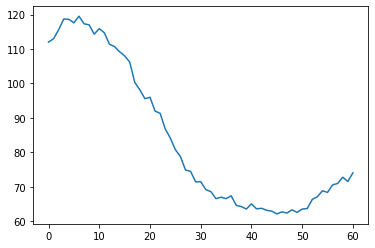

In [20]:
from matplotlib import pyplot
df['HOUGR'].plot()
pyplot.show()

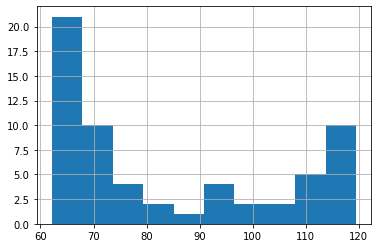

In [31]:
df['HOUGR'].hist()
pyplot.show()

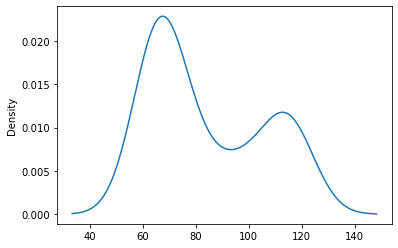

In [32]:
df['HOUGR'].plot(kind='kde')
pyplot.show()

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (10<sup>4</sup>) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 10<sup>4</sup>), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years. 

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy. 

In [ ]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP).head(10)

In [ ]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort_values(LIFE).head(10)

## Conclusions

To sum up, there is no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.

Using the [NY.GDP.PCAP.PP.CD](http://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) indicator, GDP per capita in current 'international dollars', would make for a better like-for-like comparison between countries, because it would take population and purchasing power into account. Using more specific data, like expediture on health, could also lead to a better analysis.